In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV
import numpy as np


def mean_score(scoring):
    return {i: j.mean() for i, j in scoring.items()}


dataset = pd.read_csv('phish_set.csv')
print(dataset.head)

print(pd.isnull(dataset))
dataset.fillna(-1)

<bound method NDFrame.head of       Java_script  FORM_tag  IP_address  Redirecting  Dots_count  Keywords  \
0              -1        -1          -1           -1          -1        -1   
1              -1        -1          -1           -1          -1        -1   
2              -1        -1           1           -1          -1        -1   
3              -1        -1           1           -1          -1        -1   
4              -1        -1          -1           -1           1        -1   
...           ...       ...         ...          ...         ...       ...   
2109           -1        -1          -1           -1          -1        -1   
2110           -1        -1          -1           -1          -1        -1   
2111           -1        -1          -1            1           1        -1   
2112           -1        -1          -1           -1           1        -1   
2113           -1        -1          -1           -1          -1        -1   

      Shortening_service  Port  R

,Java_script,FORM_tag,IP_address,Redirecting,Dots_count,Keywords,Shortening_service,Port,Result
0,-1,-1,-1,-1,-1,-1,-1,-1,1
1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,1,-1,-1,-1,-1,-1,1
3,-1,-1,1,-1,-1,-1,-1,-1,1
4,-1,-1,-1,-1,1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...
2109,-1,-1,-1,-1,-1,-1,-1,-1,-1
2110,-1,-1,-1,-1,-1,-1,-1,-1,-1
2111,-1,-1,-1,1,1,-1,-1,-1,-1
2112,-1,-1,-1,-1,1,-1,-1,-1,-1


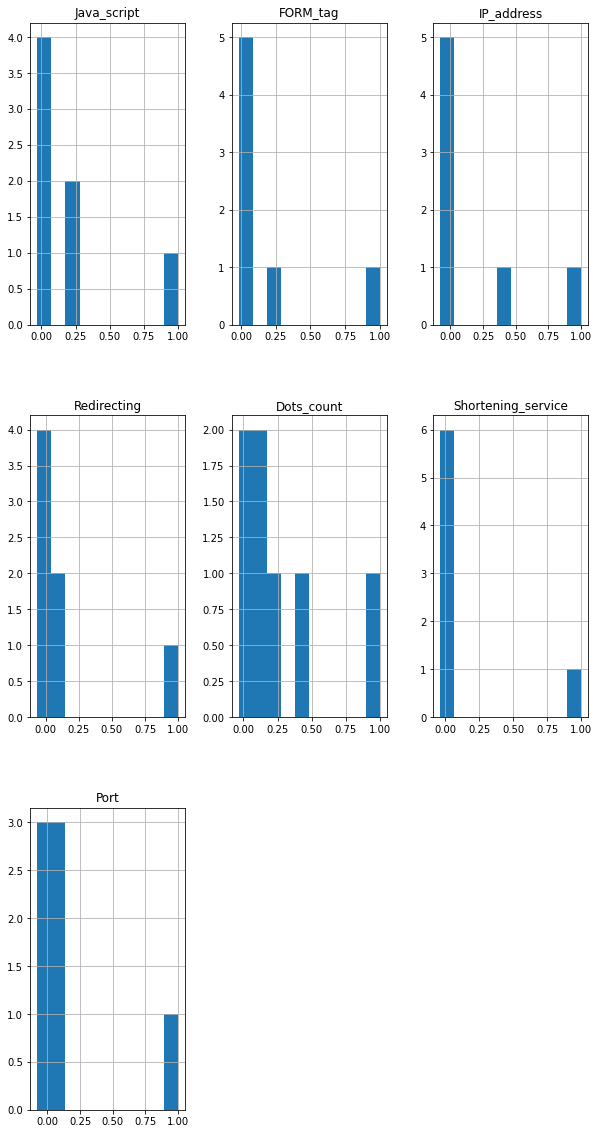

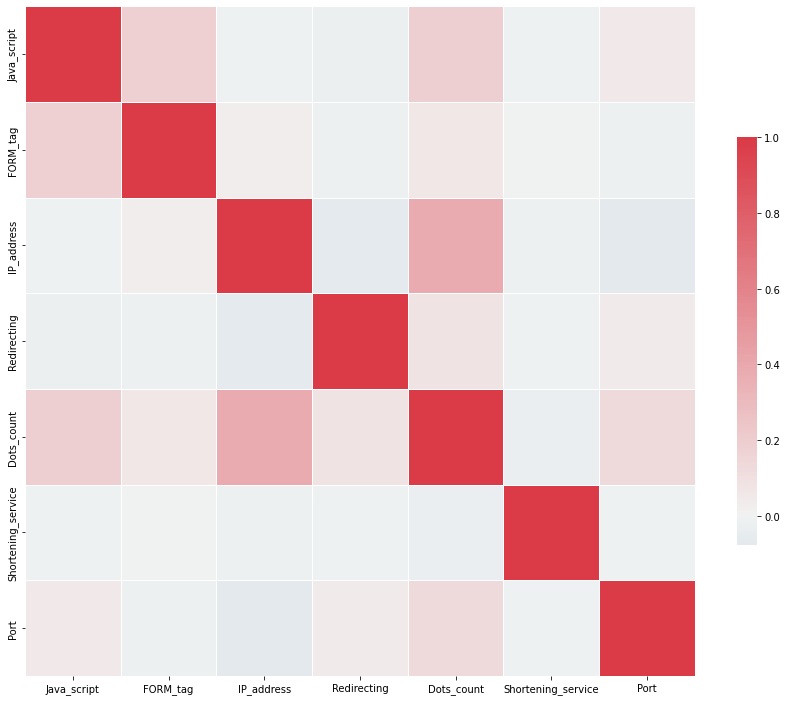

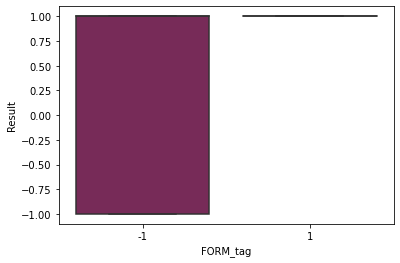

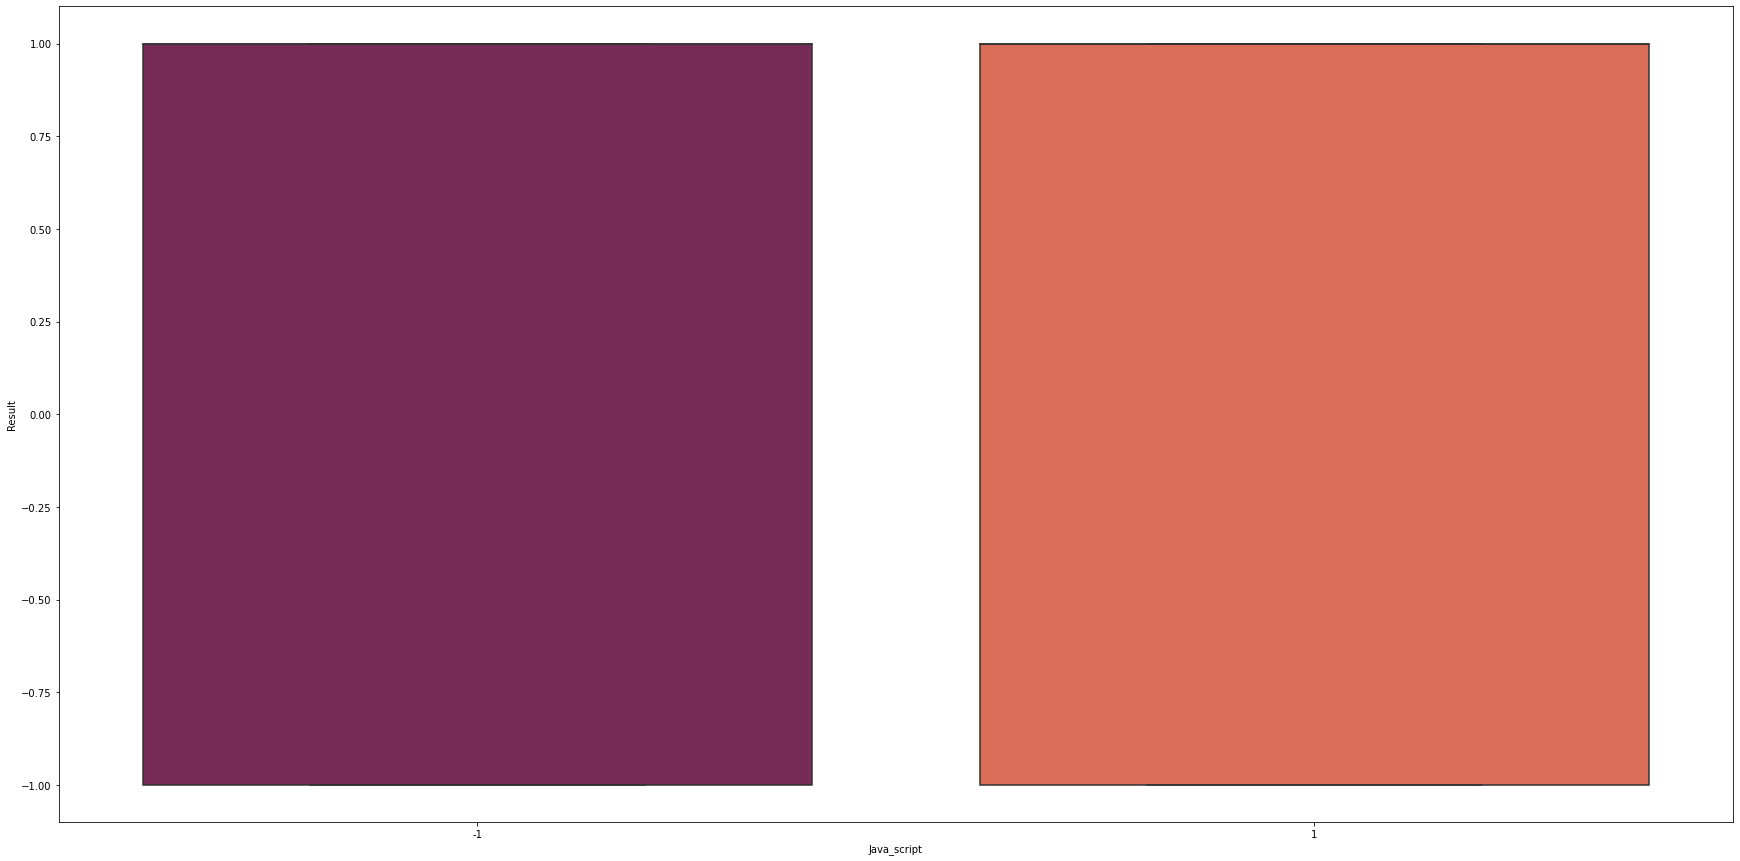

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('phish_set.csv')

corr=df[['Java_script', 'FORM_tag', 'IP_address', 'Redirecting', 'Dots_count', 'Shortening_service', 'Port']].corr(method ='kendall')

corr.hist(bins=10, figsize=(10,20))
plt.show()

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

axx = sns.boxplot(x=df["FORM_tag"], y=df["Result"], palette="rocket")
plt.rcParams['figure.figsize'] = [30, 15]
plt.show()

axx1 = sns.boxplot(x=df["Java_script"], y=df["Result"], palette="rocket")
plt.rcParams['figure.figsize'] = [1, 2]
plt.show()

In [6]:
X = dataset.drop(['Result'], axis=1)
y = dataset['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1'}
fold_count = 10

dtree_clf = DecisionTreeClassifier()
cross_val_scores = cross_validate(dtree_clf, X, y, cv=fold_count, scoring=scoring)
dtree_score = mean_score(cross_val_scores)
dtree_clf.fit(X_train, y_train)
dtr = dtree_clf.predict(X_test)
dtttr = pd.DataFrame({'Actual': y_test, 'Predicted': dtr})
print(dtttr, '\n')
print('dtree_score\n', dtree_score, '\n')
#
KNeighbors_clf = KNeighborsClassifier(5)
cross_val_scores = cross_validate(KNeighbors_clf, X, y, cv=fold_count, scoring=scoring)
KNeighbors_clf_score = mean_score(cross_val_scores)
KNeighbors_clf.fit(X_train, y_train)

y_sec_pred = KNeighbors_clf.predict(X_test)
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_sec_pred})
print(knn_df, '\nn')
print('KNeighbors_clf_score\n', KNeighbors_clf_score, '\n')

rforest_clf = RandomForestClassifier()
cross_val_scores = cross_validate(rforest_clf, X, y, cv=fold_count, scoring=scoring)
rforest_clf_score = mean_score(cross_val_scores)
rforest_clf.fit(X_train, y_train)
frst = rforest_clf.predict(X_test)
frst_df = pd.DataFrame({'Actual': y_test, 'Predicted': frst})
print(frst_df, '\n')
print('rforest_clf_score\n', rforest_clf_score, '\n')

linear_clf = svm.SVC(kernel='linear')
cross_val_scores = cross_validate(linear_clf, X, y, cv=fold_count, scoring=scoring)
linear_svc_clf_score = mean_score(cross_val_scores)
linear_clf.fit(X_train, y_train)
pred_y = linear_clf.predict(X_test)
thrd_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})
print(thrd_df, '\n')
print('linear_svc_clf_score\n', linear_svc_clf_score, '\n')

adaboost_clf = AdaBoostClassifier()
cross_val_scores = cross_validate(adaboost_clf, X, y, cv=fold_count, scoring=scoring)
adaboost_clf_score = mean_score(cross_val_scores)
adaboost_clf.fit(X_train, y_train)
adpred_y = adaboost_clf.predict(X_test)
ad_df = pd.DataFrame({'Actual': y_test, 'Predicted': adpred_y})
print(ad_df, "\n")
print("Adaboost\n", adaboost_clf_score)


      Actual  Predicted
1840      -1         -1
1486      -1         -1
1208       1          1
1996      -1          1
155        1          1
...      ...        ...
224        1         -1
760        1          1
1016       1          1
168        1         -1
160        1          1

[423 rows x 2 columns] 

dtree_score
 {'fit_time': 0.002985239028930664, 'score_time': 0.004288411140441895, 'test_accuracy': 0.7890235178395779, 'test_recall': 0.7027436023622047, 'test_precision': 0.9366093974091936, 'test_f1': 0.7993062332854419} 

      Actual  Predicted
1840      -1          1
1486      -1          1
1208       1          1
1996      -1          1
155        1          1
...      ...        ...
224        1          1
760        1          1
1016       1          1
168        1          1
160        1          1

[423 rows x 2 columns] 
n
KNeighbors_clf_score
 {'fit_time': 0.0038919448852539062, 'score_time': 0.012264466285705567, 'test_accuracy': 0.6016967718858982, 'test_recall'

In [11]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)

grid_knn_pred = knn_gscv.predict(X_test)
print('\n\n', 10*'!', 'KNN best params', 10*'!')
print(knn_gscv.best_params_)
print(confusion_matrix(y_test, grid_knn_pred))
print(classification_report(y_test, grid_knn_pred))


param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)
print('\n\n', 10*'!', 'SVM best params', 10*'!')
print(grid.best_estimator_)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))


rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

grid_rfc_pred = CV_rfc.predict(X_test)
print('\n\n', 10*'!', 'Random Forest best params', 10*'!')
print(CV_rfc.best_params_)
print(confusion_matrix(y_test, grid_rfc_pred))
print(classification_report(y_test, grid_rfc_pred))


abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'base_estimator__max_depth': [i for i in range(2, 11, 2)],
              'base_estimator__min_samples_leaf': [5, 10],
              'n_estimators': [10, 50, 250, 1000],
              'learning_rate': [0.01, 0.1]}

clf = GridSearchCV(abc, parameters, verbose=3, scoring='f1', n_jobs=-1)
clf.fit(X_train, y_train)

grid_clf = clf.predict(X_test)
print('\n\n', 10*'!', 'Ada boost best params', 10*'!')
print(clf.best_params_)
print(confusion_matrix(y_test, grid_clf))
print(classification_report(y_test, grid_clf))



 !!!!!!!!!! KNN best params !!!!!!!!!!
{'n_neighbors': 6}
[[  6 160]
 [  1 256]]
              precision    recall  f1-score   support

          -1       0.86      0.04      0.07       166
           1       0.62      1.00      0.76       257

    accuracy                           0.62       423
   macro avg       0.74      0.52      0.42       423
weighted avg       0.71      0.62      0.49       423

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, ga

In [ ]:
# BEST MODELS IS SVM, RANDOM FOREST AND ADABOOST